# Pipeline accident cost prediction

In [ ]:
Objective: Cost prediction of a pipline incident

In [1]:
import numpy as np
import pandas as pd

In [2]:
path = 'C:/Users/Alban de Boisjolly/Downloads/ENSAE/2. Python/Projet/database.csv'
df = pd.read_csv(path,delimiter=',')
print(df.shape)
print(df.info())

(2795, 48)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
Report Number                           2795 non-null int64
Supplemental Number                     2795 non-null int64
Accident Year                           2795 non-null int64
Accident Date/Time                      2795 non-null object
Operator ID                             2795 non-null int64
Operator Name                           2795 non-null object
Pipeline/Facility Name                  2674 non-null object
Pipeline Location                       2795 non-null object
Pipeline Type                           2777 non-null object
Liquid Type                             2795 non-null object
Liquid Subtype                          1349 non-null object
Liquid Name                             222 non-null object
Accident City                           2480 non-null object
Accident County                         2720 non-null object
Accident State                   

In [3]:
# Display columns' names with more than 90% nans:
def summary(x):
    print(i, " - nans in", df[x].name, ': ', df[x].isna().sum(), '/', len(df[x])) 
    #if (df[x].isna().sum()/len(df[x])) > 0.9:
     #   print(df[x].name)
        #del df[x]

for i in range(len(df.columns)):
    summary(df.columns[i])

0  - nans in Report Number :  0 / 2795
1  - nans in Supplemental Number :  0 / 2795
2  - nans in Accident Year :  0 / 2795
3  - nans in Accident Date/Time :  0 / 2795
4  - nans in Operator ID :  0 / 2795
5  - nans in Operator Name :  0 / 2795
6  - nans in Pipeline/Facility Name :  121 / 2795
7  - nans in Pipeline Location :  0 / 2795
8  - nans in Pipeline Type :  18 / 2795
9  - nans in Liquid Type :  0 / 2795
10  - nans in Liquid Subtype :  1446 / 2795
11  - nans in Liquid Name :  2573 / 2795
12  - nans in Accident City :  315 / 2795
13  - nans in Accident County :  75 / 2795
14  - nans in Accident State :  12 / 2795
15  - nans in Accident Latitude :  0 / 2795
16  - nans in Accident Longitude :  0 / 2795
17  - nans in Cause Category :  0 / 2795
18  - nans in Cause Subcategory :  0 / 2795
19  - nans in Unintentional Release (Barrels) :  0 / 2795
20  - nans in Intentional Release (Barrels) :  1586 / 2795
21  - nans in Liquid Recovery (Barrels) :  0 / 2795
22  - nans in Net Loss (Barrels)

In [4]:
# Shutdown duration column creation
# Problem : only 1341 values compared to other columns in regression with 2795 values

df['Shutdown Duration'] = (pd.to_datetime(df['Restart Date/Time']) - pd.to_datetime(df['Shutdown Date/Time'])).astype('timedelta64[h]')
print(df['Shutdown Duration'].describe()) # hours

count     1341.000000
mean       188.287845
std        894.877681
min          0.000000
25%          5.000000
50%         20.000000
75%         70.000000
max      16746.000000
Name: Shutdown Duration, dtype: float64


In [5]:
#Data table visu
#df.iloc[:10,15:48]
df.T

,0,1,2,3,4,5,6,7,8,9,...,2785,2786,2787,2788,2789,2790,2791,2792,2793,2794
Report Number,20100016,20100254,20100038,20100260,20100030,20100021,20110036,20100255,20100261,20100024,...,20170020,20170022,20170021,20170023,20170026,20170015,20170028,20170027,20170024,20170025
Supplemental Number,17305,17331,17747,18574,16276,17161,18052,18584,18050,18390,...,22026,22029,22027,22030,22044,22020,22046,22045,22032,22040
Accident Year,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,...,2016,2016,2016,2016,2016,2016,2016,2016,2017,2017
Accident Date/Time,1/1/2010 7:15 AM,1/4/2010 8:30 AM,1/5/2010 10:30 AM,1/6/2010 7:30 PM,1/7/2010 1:00 PM,1/8/2010 11:38 PM,1/9/2010 12:15 AM,1/9/2010 1:12 AM,1/10/2010 7:46 PM,1/11/2010 2:30 PM,...,12/21/2016 11:40 AM,12/22/2016 9:25 PM,12/23/2016 3:00 PM,12/24/2016 9:35 AM,12/26/2016 7:20 AM,12/27/2016 8:40 AM,12/28/2016 4:20 PM,12/29/2016 6:40 AM,1/3/2017 10:00 AM,1/9/2017 7:40 AM
Operator ID,32109,15786,20160,11169,300,11169,26041,12624,26041,31684,...,32147,32080,30829,31684,32011,32334,4906,39145,32147,30829
Operator Name,ONEOK NGL PIPELINE LP,PORTLAND PIPELINE CORP,"PETROLOGISTICS OLEFINS, LLC","ENBRIDGE ENERGY, LIMITED PARTNERSHIP","PLAINS PIPELINE, L.P.","ENBRIDGE ENERGY, LIMITED PARTNERSHIP","KINDER MORGAN LIQUID TERMINALS, LLC",MOBIL CORP,"KINDER MORGAN LIQUID TERMINALS, LLC",CONOCOPHILLIPS,...,MARATHON PIPE LINE LLC,"CCPS TRANSPORTATION, LLC",ENTERPRISE CRUDE PIPELINE LLC,PHILLIPS 66 PIPELINE LLC,"HOLLY ENERGY PARTNERS - OPERATING, L.P.",TC OIL PIPELINE OPERATIONS INC,EXXONMOBIL PIPELINE CO,ENBRIDGE STORAGE (CUSHING) L.L.C.,MARATHON PIPE LINE LLC,ENTERPRISE CRUDE PIPELINE LLC
Pipeline/Facility Name,KINDER MORGAN JCT,24-INCH MAIN LINE,NaN,SUPERIOR TERMINAL,RED RIVER EAST,NaN,NaN,HULL STATION,NaN,TANK 1501,...,ELWOOD STATION,LINE 59 KEY STATION,ECHO MANIFOLD,"NT-90, PREDO TO CARSON",RUSSELL STATION,KEYSTONE,BRRF - CHOCTAW ETHANE/PROPANE MIX SYSTEM,CUSHING CENTRAL TERMINAL,MIDLAND STATION,MARSHALL STATION
Pipeline Location,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,...,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE
Pipeline Type,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,UNDERGROUND,UNDERGROUND,UNDERGROUND,TANK,ABOVEGROUND,ABOVEGROUND,TANK,...,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,UNDERGROUND,TANK,UNDERGROUND,ABOVEGROUND
Liquid Type,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",CRUDE OIL,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",CRUDE OIL,CRUDE OIL,CRUDE OIL,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...","HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS","REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...","REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,CRUDE OIL,CRUDE OIL,CRUDE OIL,CRUDE OIL,CRUDE OIL,CRUDE OIL,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",CRUDE OIL,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",CRUDE OIL


# Columns info & description

In [6]:
df['All Costs'].sort_values(), df['All Costs'].describe()

(2221            0
 856             0
 2611            0
 838             0
 1898            0
 2666            0
 1485            0
 2479            0
 1138            0
 1629            0
 1325            0
 392             0
 1713            0
 545             0
 164             0
 619             0
 1566            0
 1316            0
 2730            0
 2714            0
 743             0
 478             0
 263             0
 1346            0
 233             0
 2546            0
 2656            0
 2758            0
 2206            0
 506             0
           ...    
 2490      9068339
 1192      9275000
 2501      9496950
 1016      9800000
 1172     10000000
 1163     10262149
 1406     11235699
 1836     11702787
 213      13184000
 1245     13844274
 86       13933600
 2258     14642600
 357      15700000
 722      15950000
 1320     16986690
 703      17904594
 334      19495905
 311      20833925
 1166     21819684
 893      23223508
 1833     24323483
 133      28

In [7]:
df['All Costs'].plot() # ==> 5 outliers identified
print(df.shape)

(2795, 49)


(2790, 49)


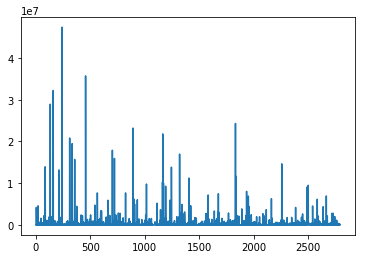

In [8]:
# Erase outliers (is it relevant?)
df2= df.drop(df.index[[194, 2103, 523, 1173, 2675]])
df2['All Costs'].plot()
print(df2.shape)

In [93]:
df["Liquid Ignition"].value_counts(), df["Liquid Explosion"].value_counts()

(NO     2700
 YES      95
 Name: Liquid Ignition, dtype: int64, NO     2780
 YES      15
 Name: Liquid Explosion, dtype: int64)

In [94]:
df['Operator ID'].value_counts(), df['Operator Name'].value_counts()

(30829    201
 18718    180
 300      156
 31618    155
 22610    140
 2552     136
 1845     115
 31684    114
 26041     87
 32147     87
 32109     75
 11169     71
 31174     60
 4906      47
 4805      42
 12105     37
 22855     36
 2731      34
 10012     33
 15674     32
 32537     32
 9175      30
 12470     30
 22442     30
 31476     29
 31580     28
 32011     26
 18092     20
 26085     19
 15774     18
         ... 
 38924      1
 32613      1
 32545      1
 32543      1
 32483      1
 26112      1
 26120      1
 26136      1
 32453      1
 15915      1
 39098      1
 39104      1
 39509      1
 2162       1
 32117      1
 39534      1
 6911       1
 31270      1
 515        1
 39302      1
 31563      1
 31583      1
 31613      1
 39286      1
 31082      1
 39264      1
 31056      1
 31723      1
 31863      1
 18386      1
 Name: Operator ID, Length: 213, dtype: int64,
 ENTERPRISE CRUDE PIPELINE LLC                        195
 SUNOCO PIPELINE L.P.                    

In [118]:
# number of distinct operator
f= df['Operator ID'].unique()
len(f)

213

In [95]:
df['Cause Category'].value_counts(), df['Cause Category'].describe()

(MATERIAL/WELD/EQUIP FAILURE    1435
 CORROSION                       592
 INCORRECT OPERATION             378
 ALL OTHER CAUSES                118
 NATURAL FORCE DAMAGE            118
 EXCAVATION DAMAGE                97
 OTHER OUTSIDE FORCE DAMAGE       57
 Name: Cause Category, dtype: int64, count                            2795
 unique                              7
 top       MATERIAL/WELD/EQUIP FAILURE
 freq                             1435
 Name: Cause Category, dtype: object)

In [96]:
df['Cause Subcategory'].value_counts(), df['Cause Subcategory'].describe()

(INTERNAL                                             362
 PUMP OR PUMP-RELATED EQUIPMENT                       296
 NON-THREADED CONNECTION FAILURE                      286
 EXTERNAL                                             230
 OTHER EQUIPMENT FAILURE                              204
 MALFUNCTION OF CONTROL/RELIEF EQUIPMENT              171
 THREADED CONNECTION/COUPLING FAILURE                 151
 CONSTRUCTION, INSTALLATION OR FABRICATION-RELATED    112
 OTHER INCORRECT OPERATION                             86
 INCORRECT VALVE POSITION                              84
 MISCELLANEOUS                                         76
 INCORRECT INSTALLATION                                72
 MANUFACTURING-RELATED                                 70
 OVERFILL/OVERFLOW OF TANK/VESSEL/SUMP                 69
 FAILURE OF EQUIPMENT BODY                             67
 DEFECTIVE OR LOOSE TUBING/FITTING                     62
 THIRD PARTY EXCAVATION DAMAGE                         57
 TEMPERATURE  

In [97]:
df['Liquid Subtype'].value_counts(), df['Liquid Subtype'].describe()

(DIESEL, FUEL OIL, KEROSENE, JET FUEL                        408
 GASOLINE (NON-ETHANOL)                                      376
 LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL GAS LIQUID)    188
 OTHER HVL                                                   171
 MIXTURE OF REFINED PRODUCTS (TRANSMIX OR OTHER MIXTURE)      98
 ANHYDROUS AMMONIA                                            55
 OTHER                                                        51
 BIODIESEL                                                     2
 Name: Liquid Subtype, dtype: int64,
 count                                     1349
 unique                                       8
 top       DIESEL, FUEL OIL, KEROSENE, JET FUEL
 freq                                       408
 Name: Liquid Subtype, dtype: object)

In [98]:
df["Pipeline Type"].value_counts(), df["Pipeline Shutdown"].value_counts()

(ABOVEGROUND        1475
 UNDERGROUND         985
 TANK                301
 TRANSITION AREA      16
 Name: Pipeline Type, dtype: int64, YES    1395
 NO     1188
 Name: Pipeline Shutdown, dtype: int64)

In [99]:
df["Liquid Type"].describe()

count          2795
unique            5
top       CRUDE OIL
freq           1398
Name: Liquid Type, dtype: object

In [53]:
df["Shutdown Date/Time"].describe(), df["Restart Date/Time"].describe()

(count                1385
 unique               1380
 top       9/27/2013 11:30
 freq                    2
 Name: Shutdown Date/Time, dtype: object, count               1338
 unique              1331
 top       8/20/2016 8:00
 freq                   2
 Name: Restart Date/Time, dtype: object)

In [9]:
print(df.groupby(['Accident Year'])['All Costs'].mean(), df.groupby(['Accident Year'])['All Costs'].count()) 
# format issue: 3,071,983
print(df2.groupby(['Accident Year'])['All Costs'].mean(), df2.groupby(['Accident Year'])['All Costs'].count()) 

Accident Year
2010    3.071983e+06
2011    7.928306e+05
2012    3.968509e+05
2013    6.945774e+05
2014    2.900540e+05
2015    5.491256e+05
2016    4.172569e+05
2017    4.361400e+04
Name: All Costs, dtype: float64 Accident Year
2010    350
2011    345
2012    366
2013    401
2014    454
2015    462
2016    415
2017      2
Name: All Costs, dtype: int64
Accident Year
2010    672400.779370
2011    402693.450581
2012    396850.890710
2013    468063.850000
2014    290054.017621
2015    240269.323210
2016    258279.115942
2017     43614.000000
Name: All Costs, dtype: float64 Accident Year
2010    349
2011    344
2012    366
2013    400
2014    454
2015    461
2016    414
2017      2
Name: All Costs, dtype: int64


In [10]:
print(pd.crosstab(df['Liquid Ignition'],df['Liquid Explosion']))

Liquid Explosion    NO  YES
Liquid Ignition            
NO                2700    0
YES                 80   15


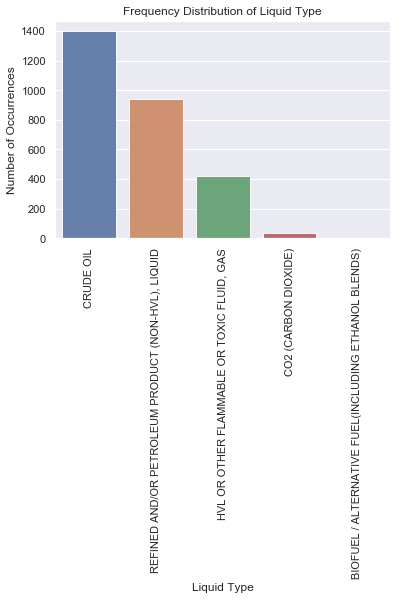

In [11]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
Liquid_Type_count = df['Liquid Type'].value_counts() # newdf
sns.set(style="darkgrid")
sns.barplot(Liquid_Type_count.index, Liquid_Type_count.values, alpha=0.9, errwidth=0.1)
plt.title('Frequency Distribution of Liquid Type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Liquid Type', fontsize=12)
plt.xticks(rotation=90)
plt.show()

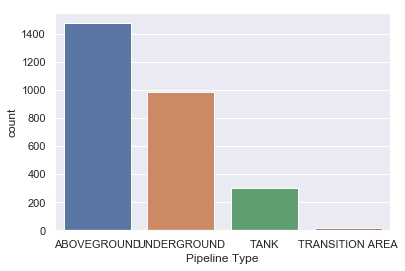

In [12]:
sns.countplot(df['Pipeline Type'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


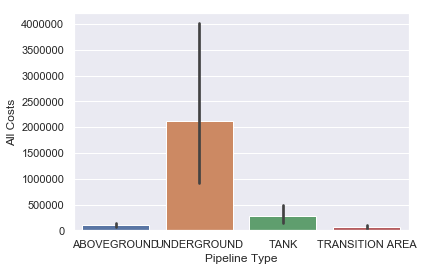

In [13]:
# Which Pipeline Type has highest cost ==> outliers are underground pipelines
df_PipeLine_Type_All_Cost = df[['Pipeline Type','All Costs']]

#sns.boxplot(x='Pipeline Type', y="All Costs",  data=df_PipeLine_Type_All_Cost)

sns.barplot(x='Pipeline Type', y="All Costs",  data=df_PipeLine_Type_All_Cost)

# New dataset

In [55]:
s = []
#s = pd.Series(['All Costs', 'Shutdown Duration', 'Net Loss (Barrels)', 'Operator ID', 'Pipeline Type', 'Liquid Type',
#               'Cause Category', 'Liquid Ignition', 'Liquid Explosion',])

s = pd.Series([4,8,9,17,23,24,22,48,47])

newdf = df[df.columns[s[:,]]]
print(newdf.shape)
newdf.head()
#newdf.info()

(2795, 9)


,Operator ID,Pipeline Type,Liquid Type,Cause Category,Liquid Ignition,Liquid Explosion,Net Loss (Barrels),Shutdown Duration,All Costs
0,32109,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",INCORRECT OPERATION,NO,NO,21.0,NaN,1627
1,15786,ABOVEGROUND,CRUDE OIL,MATERIAL/WELD/EQUIP FAILURE,NO,NO,0.0,NaN,4008
2,20160,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",MATERIAL/WELD/EQUIP FAILURE,NO,NO,2.0,NaN,200
3,11169,UNDERGROUND,CRUDE OIL,NATURAL FORCE DAMAGE,NO,NO,0.0,NaN,11540
4,300,UNDERGROUND,CRUDE OIL,EXCAVATION DAMAGE,NO,NO,2.0,NaN,29650


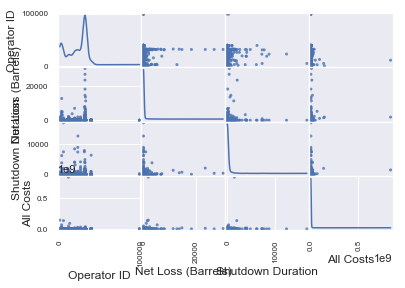

In [50]:
from pandas.plotting import scatter_matrix
scatter_matrix(newdf, alpha=0.8, diagonal='kde')
plt.show()

# One-Hot encoding

In [56]:
# because there are different objects in this column:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

newdf['Pipeline Type'] = newdf['Pipeline Type'].astype(str)
lb_results = lb.fit_transform(newdf['Pipeline Type'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
newdf = pd.concat([newdf, lb_results_df], axis=1)

newdf['Liquid Type'] = newdf['Liquid Type'].astype(str)
lb_results = lb.fit_transform(newdf['Liquid Type'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
newdf = pd.concat([newdf, lb_results_df], axis=1)

newdf['Cause Category'] = newdf['Cause Category'].astype(str)
lb_results = lb.fit_transform(newdf['Cause Category'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
newdf = pd.concat([newdf, lb_results_df], axis=1)
'''
newdf['Liquid Ignition'] = newdf['Liquid Ignition'].astype(str)
lb_results = lb.fit_transform(newdf['Liquid Ignition'])
lb_results_df = pd.DataFrame([lb_results], columns=lb.classes_)
newdf = pd.concat([newdf, lb_results_df], axis=1)

newdf['Liquid Explosion'] = newdf['Liquid Explosion'].astype(str)
lb_results = lb.fit_transform(newdf['Liquid Explosion'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
newdf = pd.concat([newdf, lb_results_df], axis=1)
'''
newdf['Operator ID'] = newdf['Operator ID'].astype(str)
lb_results = lb.fit_transform(newdf['Operator ID'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
newdf = pd.concat([newdf, lb_results_df], axis=1)

# handle error messages
import warnings
warnings.filterwarnings("ignore")

print(newdf.shape)
newdf.iloc[:8,:15]

# problems: random number of columns!!!!! and 2795 row!!!
# columns "nan" to be deleted

# Pipeline type ==> 4 --> total of 229 + 9 = 238 (one more due to a nan column)
# Liquid Type ==> 5
# cause category ==> 7
# Operator ID ==> 213
# Liquid Ignition ==> 2
# Liquid Explosion ==> 2

(2795, 239)


,Operator ID,Pipeline Type,Liquid Type,Cause Category,Liquid Ignition,Liquid Explosion,Net Loss (Barrels),Shutdown Duration,All Costs,ABOVEGROUND,TANK,TRANSITION AREA,UNDERGROUND,nan,BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)
0,32109,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",INCORRECT OPERATION,NO,NO,21.00,NaN,1627,1,0,0,0,0,0
1,15786,ABOVEGROUND,CRUDE OIL,MATERIAL/WELD/EQUIP FAILURE,NO,NO,0.00,NaN,4008,1,0,0,0,0,0
2,20160,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",MATERIAL/WELD/EQUIP FAILURE,NO,NO,2.00,NaN,200,1,0,0,0,0,0
3,11169,UNDERGROUND,CRUDE OIL,NATURAL FORCE DAMAGE,NO,NO,0.00,NaN,11540,0,0,0,1,0,0
4,300,UNDERGROUND,CRUDE OIL,EXCAVATION DAMAGE,NO,NO,2.00,NaN,29650,0,0,0,1,0,0
5,11169,UNDERGROUND,CRUDE OIL,MATERIAL/WELD/EQUIP FAILURE,NO,NO,2237.00,105.0,4194715,0,0,0,1,0,0
6,26041,TANK,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",MATERIAL/WELD/EQUIP FAILURE,NO,NO,5.00,NaN,70400,0,1,0,0,0,0
7,12624,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",NATURAL FORCE DAMAGE,NO,NO,0.24,NaN,413,1,0,0,0,0,0


In [52]:
newdf['Liquid Ignition'].values.ndim, newdf['Pipeline Type'].values.ndim 

(1, 1)

In [57]:
del newdf['nan']
#newdf.drop(newdf.columns[[0,8]], axis=1)
print(newdf.shape)
print(newdf.iloc[:8,8:28])

(2795, 238)
   All Costs  ABOVEGROUND  TANK  TRANSITION AREA  UNDERGROUND  \
0       1627            1     0                0            0   
1       4008            1     0                0            0   
2        200            1     0                0            0   
3      11540            0     0                0            1   
4      29650            0     0                0            1   
5    4194715            0     0                0            1   
6      70400            0     1                0            0   
7        413            1     0                0            0   

   BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)  CO2 (CARBON DIOXIDE)  \
0                                                  0                        0   
1                                                  0                        0   
2                                                  0                        0   
3                                                  0                        0 

In [64]:
del newdf[[0,8]]

print(newdf.shape)
print(newdf.head())

TypeError: '[0, 8]' is an invalid key

# Could be also interesting to predict costs with all variables without nans value... (try) 

In [79]:
drona = df.dropna(axis=1)
print(drona.shape)
drona.head()

(2795, 18)


,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline Location,Liquid Type,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,ONSHORE,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",38.67070,-97.78123,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.00,21.0,NO,NO,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,ONSHORE,CRUDE OIL,43.94028,-70.49336,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.12,0.0,NO,NO,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",ONSHORE,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",30.18240,-93.35240,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.00,2.0,NO,NO,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",ONSHORE,CRUDE OIL,46.68930,-92.06120,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.48,0.0,NO,NO,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",ONSHORE,CRUDE OIL,33.58266,-96.64881,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,698.00,2.0,NO,NO,29650


In [138]:
import matplotlib
import matplotlib.pyplot as plt

#drona.iloc[:,12:15].plot(kind='box', subplots=True, layout = (1,3), sharex=False, sharey=False)
#plt.show()
plo = newdf2[['Unintentional Release (Barrels)'], ['Liquid Recovery (Barrels)'], ['Net Loss (Barrels)']]
plo.plot(kind='box', subplots=True, layout=(1,3), sharex=False, sharey=False)
plt.show()

#df.boxplot(column='Unintentional Release (Barrels)')

TypeError: unhashable type: 'list'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022789832400>,
      dtype=object)

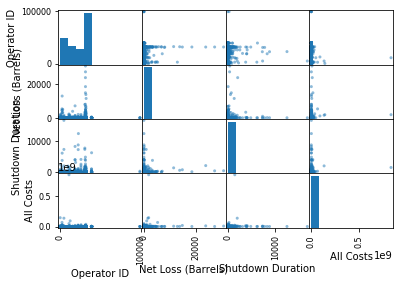

In [47]:
pd.tools.plotting.scatter_matrix(newdf.select_dtypes(exclude=['object']))

# Model (part meaning less for now)

In [86]:
%matplotlib inline
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_predict, train_test_split
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot

# Extract the X and y data from the DataFrame 
#X = drona.drop('All Costs', axis=1)
#X = drona['Unintentional Release (Barrels)','Liquid Recovery (Barrels)','Net Loss (Barrels)']
X = drona.iloc[:,12:14]
y = drona['All Costs']

# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

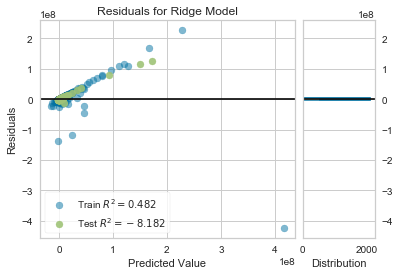

In [88]:
# Instantiate the linear model and visualizer # Insta 
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

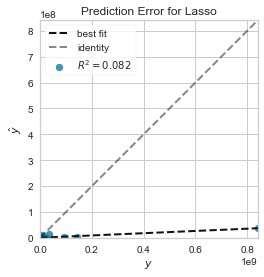

In [49]:
# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

In [91]:
from sklearn.ensemble import RandomForestRegressor
import math
import sklearn.metrics as metrics

# Extract columnson train X
X2= X
y2= y
# Model creation and fit
model2 = RandomForestRegressor()
model2.fit(X2,y2)
# Show model results of training set
y2_hat = model2.predict(X2)
mae = metrics.mean_absolute_error(y2,y2_hat)
mse = metrics.mean_squared_error(y2,y2_hat)
print ("TRAINING SET")
print ("=========================================")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", model2.score(X2,y2))
print ("feature_importances:", model2.feature_importances_)
print ("n_features:         ", model2.n_features_)
print ("n_outputs:          ", model2.n_outputs_)

TRAINING SET
MAE:                 586780.7794735647
RMSE:                11288144.710189322
r2:                  0.5362107927054954
feature_importances: [0.49003789 0.50996211]
n_features:          2
n_outputs:           1
